## Комп'ютерний практикум №4

- з Обробки Біо-Медичних Даних
- студентки ФБМІ, групи БС-81
- Мишкарьової Ангеліни

### **Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt

 

1.   Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.






In [2]:
myData = [];
for i in range(10):
    if (i < 5):
        myData.append(sorted(np.random.normal(0, 1, size = 20)))
    else:
        myData.append(sorted(np.random.pareto(5, size = 20)))

    print(str(myData[i])+'\n')

[-2.074878998549424, -1.6771426089573438, -0.9339806341021629, -0.901805973794391, -0.6060150636358161, -0.4742462102736443, -0.45360364609158255, -0.29750021439292096, -0.25901632422005527, 0.00622303877489868, 0.029123846138314032, 0.1441909893453093, 0.14570945765093762, 0.20456810476005963, 0.4534458490394158, 0.6635457625737988, 0.7330319774172176, 0.7433312475702633, 0.9736633557949838, 2.6982892229374564]

[-2.015883599587869, -0.7677456856576613, -0.6334151768838158, -0.5610367499643899, -0.5569648883480769, -0.4415746660334212, -0.35732795853857396, 0.1602791972130693, 0.28600718266374925, 0.3718187762063936, 0.3745853031739683, 0.5683945374094608, 0.5805640906518182, 0.6915751750587412, 0.7487630599106175, 0.9729871402332685, 1.0268788245326794, 1.1676311883073434, 1.201382357637744, 2.725204826523008]

[-2.2832643013970833, -1.1833917953060529, -0.9886488947806821, -0.9352867495253003, -0.8659167316823324, -0.5491258070082057, -0.5321891105099317, -0.5026326727871504, -0.078

2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf



In [3]:
def shapiroWilk(data):
    n = len(data)
    
    coefs = pd.read_excel("Coeficients for the W test for normality.xlsx")[n]/10000
    potdoW = pd.read_excel("Рoints of the distribution of W.xlsx")[ 'Unnamed: 1'][n]/1000
    
    k = 0
    if (n % 2 == 0):
        k = int(n/2)
    else:
        k = int((n-1)/2)
        
    m = np.mean(data)
    nm2 = 0
    for i in data:
        nm2 += (i - m)**2
        
    b = 0
    for i in range (k):
        b += coefs[i] * (data[n-i-1] - data[i])
        
    w = (b**2)/nm2
    if (w >= potdoW):
        return "Normal"
    else:
        return "Not normal"

3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing

4. Занести в стовпчик Variable назви змінних.

5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".

6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].



7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].

In [6]:
newtable = pd.DataFrame(
{
    "Variable": ["Normal" if (i < 5) else "Pareto" for i in range(10)],
    "Statistics": ["%.3f[%.3f]" % (np.mean(myData[i]), np.std(myData[i])) if (shapiroWilk(myData[i]) == "Normal") else 
                   "%.3f[%.3f , %.3f]" % (np.median(myData[i]), np.quantile(myData[i], 0.25), np.quantile(myData[i], 0.75))
                   for i in range(10)],
    "Distribution": [shapiroWilk(myData[i]) for i in range(10)],
})

newtable

,Variable,Statistics,Distribution
0,Normal,-0.044[0.994],Normal
1,Normal,0.277[0.969],Normal
2,Normal,-0.166[0.798],Normal
3,Normal,0.014[0.945],Normal
4,Normal,0.430[0.897],Normal
5,Pareto,"0.119[0.048 , 0.193]",Not normal
6,Pareto,"0.167[0.071 , 0.291]",Not normal
7,Pareto,"0.148[0.062 , 0.264]",Not normal
8,Pareto,"0.052[0.025 , 0.193]",Not normal
9,Pareto,"0.147[0.076 , 0.367]",Not normal


8. Зберегти таблицю в пдф форматі

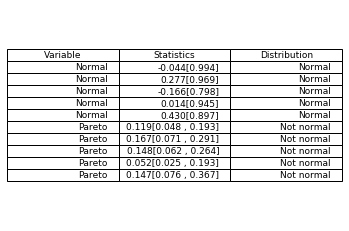

In [7]:
fig = plt.figure()

myplot = fig.add_subplot(111) #111 - 1x1 grid, first subplot

cell_text = []
for row in range(len(newtable)):
    cell_text.append(newtable.iloc[row])

myplot.table(cellText = cell_text, colLabels = newtable.columns, loc = 'center')
myplot.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()